In [346]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# My Details:

*   Name: Nadav Shlomo Shaoulian
*   ID: 311235584
*   Kaggle User Profile: https://www.kaggle.com/NadavShaoulian





# Competition Details:
 
The sinking of the Titanic is one of the most infamous shipwrecks in history.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

At this competition we'll use machine learning to create a model that predicts which passengers survived the Titanic shipwreck, based on passengers data.

We'll deal with the missing data, categorize data and we will use 3 different prediction models: SGD classifier, Logistic Regression and Neural Networks.


> 
> RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.

# Visualization:

In [347]:

%matplotlib inline

#for plotting the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import uniform
import plotly.express as px
import plotly.graph_objects as go
from tqdm.auto import tqdm
# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import cross_val_score

In [348]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

from sklearn.ensemble import RandomForestRegressor

# **Data Dictionary:**

**Survived** - Tells if passenger survived or not.

---


**Name** - Passenger's name.

---


**Pclass** - Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower).

---


**Sex** - Male/Female.

---


**Age** - Passenger's age in years.

---


**SibSp** - Number of siblings/spouses aboard the Titanic. Sibling = brother, **sister**, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored).

---


**Parch** - Number of parents/chilren aboared the Titanic. Some children travelled only with a nanny,therefore parch=0 for them.

---


**Ticket** - Ticket number.

---


**Fare** - Passenger fare.

---


**Cabin** - Cabin number.

---


**Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

---





In [349]:
train_df #checks the data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Our data

as we can see there are 891 rows and 12 columns as every column represent each feature .

### Our target : 'SURVIVED' column

our purpose is to predict wich passenger survived (or not) due to model that is build.

we will use logistic regression with SGDClassifier



In [350]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [351]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# Our Features
as we can see each feature has its own type .
our ideal is to work with numeric dtypes so we can analyze more efficiantly .

# **Cleaning the data**
### Missing values
some of our feature`s rows are lack of values.
our next mission is to fill them. 


In [352]:
#in order to fill the missing parts
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
# Display training data missing values  
print('Titanic training dataframe missing values: ')
display_missing(train_df)

# Display test data missing values
print('Titanic test dataframe missing values: ')
display_missing(test_df)

Titanic training dataframe missing values: 
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Titanic test dataframe missing values: 
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




### Age
age is missning 177 values in train and 88 in test , in order to not harm the other values we will fil the missing values with the median.

In [353]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())

### Fare
there is one value missing in fare column in test dataframe.
we will insert the median of the pclass parch and sibsp columns because it all efects the fare value , and then we will insert it in the 

In [354]:
med_fare = test_df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
test_df['Fare'] = test_df['Fare'].fillna(med_fare)


### **Inspection :**
one of our features is missing big amount of values , so we will remove it.


after that we we will check if the removal worked .




In addition ticket column is not intersting to us at all so we will remove it aswell.

We dont want that the machine will learn passengerId column because it ordinaly orginazed.
the machine is looking for some patterns and it absoultely worng.
therefore we will remove it.

In [355]:
print("Before", train_df.shape, test_df.shape)

test_ids = test_df['PassengerId']
train_df = train_df.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape

Before (891, 12) (418, 11)


('After', (891, 9), (418, 8))


in order to show the hitmap , our features must be numerical .

there are couple of features that we are intersted of :

sex , embarked.

In [356]:

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


as we can see in the info list , there are 2 embarked values that are missing , in order to change the embarked col to numeric we need to fill the entire values so we will fill the missing cells with the most common value.

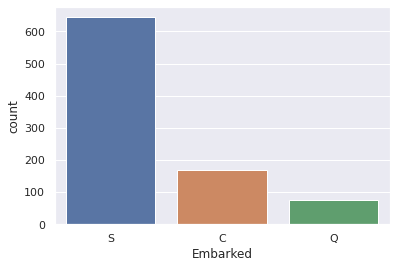

In [357]:
sns.countplot(x='Embarked', data=train_df)

### Conclusion
Southampton is the most common embarked place , so we will fill the null values with 'S'.

In [358]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

Now after all data cleaning we will check if there are NaN values .
just to make sure .

In [359]:
train_df.isna().any()
test_df.isna().any()

Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [360]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Embarked is the last column that is not numeric. lets change it to numeric symbols

In [361]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( { 'C': 2, 'Q': 1, 'S': 0} ).astype(int)
train_df.head()    
test_df.head() 

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0


### **Embarked**
now we want to check if people embraked place has relation to surviving .


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



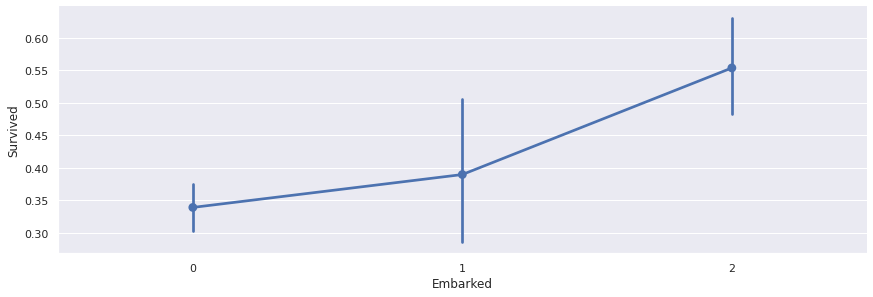

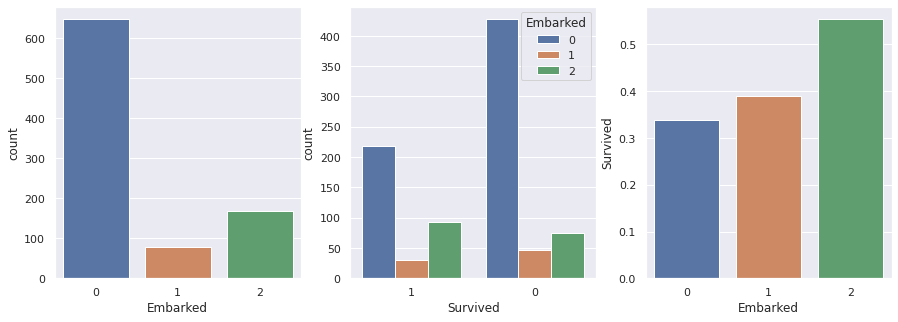

In [362]:
sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)


# group by embarked, and get the mean for survived passengers for each value in Embarked
#reminder 'C': 2, 'Q': 1, 'Southampton': 0
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,ax=axis3)

plt.show()

## **Conclusion**
reminder 'C': 2, 'Q': 1, 'Southampton': 0

> 

we can see that embarked does effect the odds to survive, people who embarked in Cherbourg are more likely to survive.



### **Sex**
at first , lets check if sex is make any diffrence to survived odds

In [363]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


## **Conclusion**
we can see that females are more likely to survive.


# HeatMap
finally after data was cleaned we cann builed the heatmap.
we will look for low correlation in order to decrease our features or maybe to appeand some of them togather .


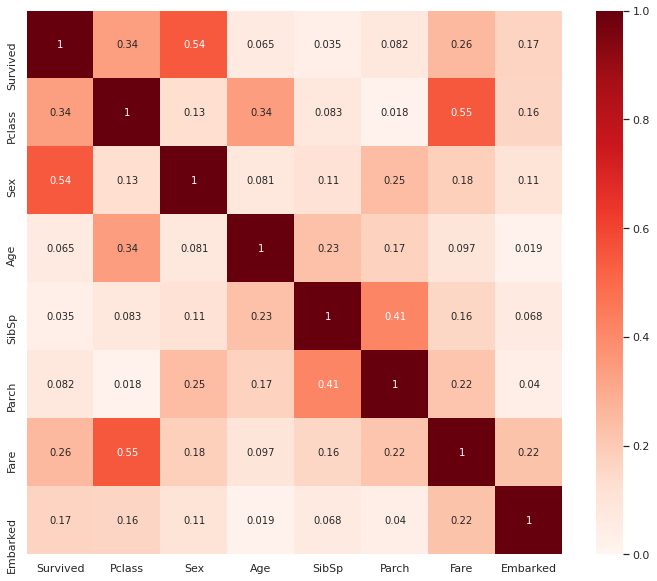

In [364]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(train_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

# Conclusion
As we can see survived with parch will give use 0.04 score , and survived with SibSp will give use 0.068 score .


theese are really low scores .


In addition we can see that the correltion between parch and sibsp give us 0.41 score wich is pretty high they have some relation between them .


## **Next step**
we can now create new feature called family size .

two of our feature combined will give us this feature (SibSp + Parch).

in order to remove them

# FamilySize

we will add new column and build some graphs to show if our new feature data is related to our target

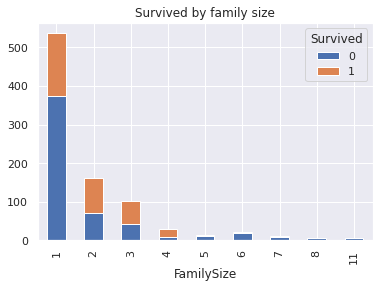

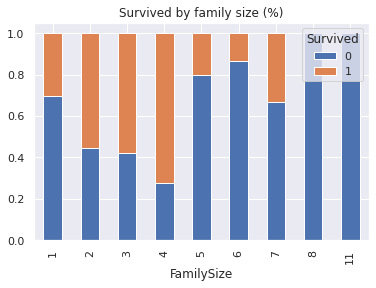

In [365]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
pd.crosstab(train_df['FamilySize'], train_df['Survived']).plot(kind='bar', stacked=True, title="Survived by family size")
pd.crosstab(train_df['FamilySize'], train_df['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)")

## Conclusion 
Families with 4 kids are more likley to survive.

## Removal
removing SibSp and Parch


In [366]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)


# Second HeatMap

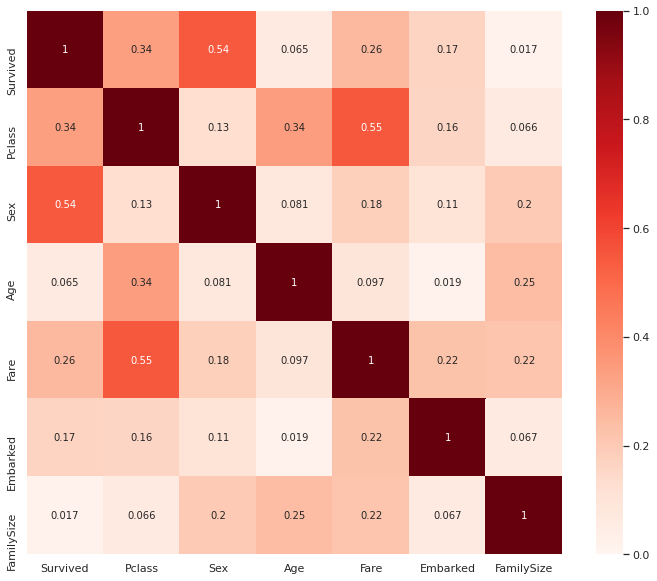

In [367]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(train_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

## Conclusion
Unfortunately our new feature familySize according to the heatmap does not contribute to our research (correltion score is low).


In [368]:
train_df.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.064910,0.257307,0.167675,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339898,-0.549500,-0.162098,0.065997
Sex,0.543351,-0.131900,1.000000,-0.081163,0.182333,0.108262,0.200988
Age,-0.064910,-0.339898,-0.081163,1.000000,0.096688,0.018754,-0.245619
Fare,0.257307,-0.549500,0.182333,0.096688,1.000000,0.224719,0.217138
Embarked,0.167675,-0.162098,0.108262,0.018754,0.224719,1.000000,-0.066516
FamilySize,0.016639,0.065997,0.200988,-0.245619,0.217138,-0.066516,1.000000


### Fare
acording to the heatmap fare column has the biggest score value .
lets build a graph and see if we can analyze something.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


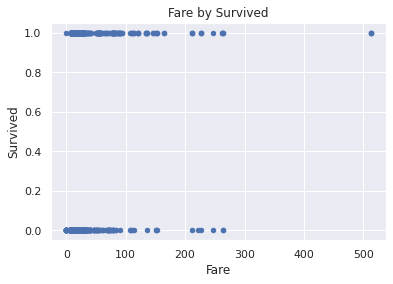

In [369]:
# plot the connection between 2 features
def plot_connection_between_2_features(df, feature_1_name, feature_2_name):
    df.plot.scatter(x=feature_1_name, y=feature_2_name, title=f'{feature_1_name} by {feature_2_name}')

plot_connection_between_2_features(train_df, 'Fare', 'Survived')



Something that might help the model to predict due to fare column is maybe to duplicate the column.

# Model, predict and solve
Now we are ready to train a model and predict the required solution.

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features .
We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset.

Our model will use Logistic Regression.

In [370]:

train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

In [371]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,2,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,1
887,1,1,1,19.0,30.0000,0,1
888,0,3,1,28.0,23.4500,0,4
889,1,1,0,26.0,30.0000,2,1


# Spliting the test data

In [372]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [373]:
X_train.shape


(891, 6)

In [374]:
Y_train.shape

(891,)

In [375]:
# features_train, features_test, labels_train, labels_test = \
#     train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

#Logistic Regression

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference https://en.wikipedia.org/wiki/Logistic_regression .

In [376]:


print(X_train.head())
print(X_test.head())

   Pclass  Sex   Age     Fare  Embarked  FamilySize
0       3    0  22.0   7.2500         0           2
1       1    1  38.0  71.2833         2           2
2       3    1  26.0   7.9250         0           1
3       1    1  35.0  53.1000         0           2
4       3    0  35.0   8.0500         0           1
   Pclass  Sex   Age     Fare  Embarked  FamilySize
0       3    0  34.5   7.8292         1           1
1       3    1  47.0   7.0000         0           2
2       2    0  62.0   9.6875         1           1
3       3    0  27.0   8.6625         0           1
4       3    1  22.0  12.2875         0           3


In [377]:
train_df.isna().any()

Survived      False
Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
FamilySize    False
dtype: bool

In [378]:
test_df.isna().any()

Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
FamilySize    False
dtype: bool

Method that run the validation test and temporary test data into the model.
this method helps us to change the test ratio easly.

In [379]:
def logistic_reg_with_sgd(X,t,test_ratio= 0.2,print_loss = True):
    X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=test_ratio, random_state=2)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.001)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_test)
    if print_loss:
        print('Accuracy score on train', SGD_cls.score(X_train, t_train))
        print('Accuracy score on test', SGD_cls.score(X_test, t_test))
        print()
        print('CE on train', metrics.log_loss(t_train, y_train_prob))
        print('CE on test', metrics.log_loss(t_test, y_test_prob))
    
    return SGD_cls,metrics.log_loss(t_train, y_train_prob)


Our data is devided into 7 columns , in order to check if the machine predicts more efficant without some of the features we will split the data.
earn the machine with more expirence and make it better predictade .
At first we will split the train data into 80% to temporary test_data and 20% validation.

After that we will change the data with constant.



we will use SGDClassifier to logistic reggresion model.

In [380]:
#80% 20%
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=2)
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.62067684 0.37932316]
 [0.22357701 0.77642299]
 [0.96380744 0.03619256]
 [0.93958007 0.06041993]
 [0.88175032 0.11824968]]

first 5 predictions of y_train:
[0 1 0 0 0]

first 5 probabilities of y_test_prob:
[[0.7156874  0.2843126 ]
 [0.88700302 0.11299698]
 [0.22391707 0.77608293]
 [0.90668433 0.09331567]
 [0.56405558 0.43594442]]

first 5 predictions of y_test:
[0 0 1 0 0]


lets check the accuracy score.

In [381]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8089887640449438
Accuracy score on test 0.7653631284916201

CE on train 0.4286359621601179
CE on test 0.5091443826382566


In [382]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

now , lets check several devide variation of the validation. 

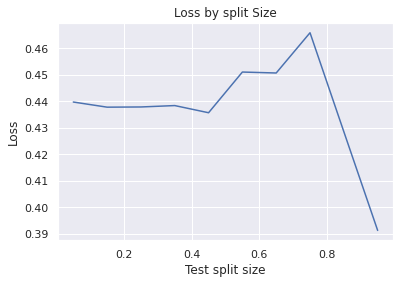

In [383]:
test_size = 0.05
test_sizes = []
loss_points = []
for i in range(10):
    model, loss = logistic_reg_with_sgd(X_train,Y_train,test_ratio = test_size,print_loss = False)
    loss_points.append(loss)
    test_sizes.append(test_size)
    test_size += 0.1
plt.title('Loss by split Size')
plt.ylabel('Loss')
plt.xlabel('Test split size')
plt.plot(test_sizes,loss_points)
plt.show()


In this graph we see the ratio between our train temporary and the validation as test .

When the test size is bigger, the loss grows a little bit.

if the test has low data we might get overfitting . 


In [384]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, Y_train)

y_test = SGD_cls.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": y_test
})
    
submission.to_csv('submission.csv',index=False)


#Score:

Submisions list as the best score is on top

![picture](https://i.ibb.co/hXqZ7rQ/image.png)


##Table :

![picture](https://i.ibb.co/0nxyy2K/image.png)

# Resources:
1. Wikipedia
2. Titanic Data Science Solutions - https://www.kaggle.com/startupsci/titanic-data-science-solutions
3. Class practices (College of engineering "AFEKA").


# Conclusions
It was really intersting work , exploring and reasrching the data sends you to the actual case.

I searched about the titanic on the internet and i saw many interesting details.

I saw that that the age and sex had the most correlation with the odds to survive.




# **Exercise 3**

In this exercise we want to use several techniques we learned in class, such as **KNN** as a model , cross validation using **KFold**  , **Feature selection** , **Ensamble** and **confusion matrix**.

In [385]:
display(train_df)
display(test_df)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,2,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,1
887,1,1,1,19.0,30.0000,0,1
888,0,3,1,28.0,23.4500,0,4
889,1,1,0,26.0,30.0000,2,1


,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,1,1
1,3,1,47.0,7.0000,0,2
2,2,0,62.0,9.6875,1,1
3,3,0,27.0,8.6625,0,1
4,3,1,22.0,12.2875,0,3
...,...,...,...,...,...,...
413,3,0,27.0,8.0500,0,1
414,1,1,39.0,108.9000,2,1
415,3,0,38.5,7.2500,0,1
416,3,0,27.0,8.0500,0,1


In [386]:
x = train_df.drop(columns='Survived')
t = train_df['Survived']

print('X:')
display(x)

print('\nt:')
display(t)

X:


,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,22.0,7.2500,0,2
1,1,1,38.0,71.2833,2,2
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,2
4,3,0,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,1
887,1,1,19.0,30.0000,0,1
888,3,1,28.0,23.4500,0,4
889,1,0,26.0,30.0000,2,1



t:


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [387]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    int64  
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [388]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    int64  
 5   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [389]:
ct = ColumnTransformer([
    ("encoding_cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard_poly", make_pipeline(PolynomialFeatures(degree=2), StandardScaler()), numerical_cols)],
    remainder='passthrough')

In [390]:
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared = False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared = False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [391]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [392]:
model_pipe = make_pipeline(ct, SGDClassifier(loss='log', random_state=2))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(x, t, model_pipe, k=10, show_score_loss_graphs=True)

#Search for the best hyper parameters
Each parameter value can make our model better (or worse).
We want to be able to find the best hyperparameters for our models.

Let`s compare between two well known hyper parameters search , and then decide wich one is the best for our hyper parameters.



###Grid Search
Search that is try all combinations of parameters and find the best one .



In [393]:
hyper_params = { 'penalty': ('l1', 'l2', 'elasticnet'),
                    'alpha': [0.1, 0.01, 0.001, 0.0001],
                    'max_iter': [1000, 500],
                    'learning_rate': ('constant', 'optimal', 'invscaling', 'adaptive'),
                    'eta0': [0.1, 0.01, 0.001, 0.0001]}
X_encoded = pd.DataFrame(ct.fit_transform(x))

gs_model = GridSearchCV(SGDClassifier(loss='log', random_state=2), hyper_params).fit(X_encoded, t)
print('grid search score:', gs_model.best_score_)
print('grid search params:', gs_model.best_params_)

grid search score: 0.8237963718536188
grid search params: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l1'}


as we can see our best regularization method is Lasso Regression ,adaprive learning rate with alpha value of 0.001. 


###Random Search 
Less acruate , try random combinations.

In [394]:
# train with random search and get best parameters
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), hyper_params, random_state=1).fit(X_encoded, t)
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

rs_model 0.8092021844203126
best params {'penalty': 'l2', 'max_iter': 1000, 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': 0.01}


as we can see grid search provide better score .

#Ensembles
Lets use a collection of models to make more accurate predictions and lower the variance.

In classification, we can take the mean of all the probabilities of the model or choose the class that most of the models chose for some sample.
It is like **"The wisdom of the crowd"**.
One model may be wrong, but a lot of different models are less prone to errors.

We are going to use two types of ensembles:

**Bagging** (with **NFold** or with **Bootstrap**).

**Boosting**.

###Bagging

In [395]:
# get score with nfold bagging
from sklearn.ensemble import BaggingClassifier

bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=False).fit(X_encoded, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_encoded, t).mean())

Accuracy score for classification:
bag_fold_model 0.8260381593714927


###Boosting

In [396]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=True).fit(X_encoded, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_encoded, t).mean())

Accuracy score for classification:
bag_boot_model 0.8271604938271605


Boosting is slightly better but the difference is small and it may change if we use bigger n_estimators.

Let's try AdaBoosting.

but first in order to use this model we will need to grid search and find the best params for this model.

In [397]:
# get best n_estimators with AdaBoost on full data
hyper_parameters = {'n_estimators': [x for x in range(50, 501, 50)]}

ada_gs = GridSearchCV(AdaBoostClassifier(random_state=1), hyper_parameters).fit(X_encoded, t)
print('gs_model', ada_gs.best_score_)
print('best params', ada_gs.best_params_)

gs_model 0.8238089259933462
best params {'n_estimators': 300}


In [398]:
# get score with ada boosting
ada_boost_model = AdaBoostClassifier(**ada_gs.best_params_, random_state=1).fit(X_encoded, t)
print('ada_boost_model', ada_boost_model.score(X_encoded, t).mean())

ada_boost_model 0.9102132435465768


In [399]:
# # get score with ada boosting
# from sklearn.ensemble import AdaBoostClassifier

# ada_boost_model = AdaBoostClassifier(ada_gs.best_params_,random_state=1).fit(X_encoded, t)
# print('Accuracy score for classification:')
# print('ada_boost_model', ada_boost_model.score(X_encoded, t).mean())

ada boost looks better than the rest so we will use him.

In [400]:
# Split the data to train and validation
x_train, x_val, t_train, t_val = model_selection.train_test_split(X_encoded, t, test_size=0.2, random_state=2)

In [401]:
# show the accuracy by model
ensembles = {'Bag_Fold': bag_fold_model, 'Bag_Boost': bag_boot_model, 'AdaBoost': ada_boost_model}

def show_accuracy_by_model(X_train, t_train, X_val, t_val, models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])

    for model_name, model in models.items():
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', model.score(X_val, t_val)]

    fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group')
    fig.show()

show_accuracy_by_model(x_train, t_train, x_val, t_val, ensembles)

#Feature Selection
at first lets check what is the optimal number of features according to the cross validation score.

In [402]:
selector = RFECV(SGDClassifier(loss='log', random_state=1, **gs_model.best_params_), cv=RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)).fit(X_encoded, t)

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()


print("Number of features: {}".format(len(X_encoded.loc[:, selector.support_].keys())))

Number of features: 8


In [403]:
X_best_ft = X_encoded.loc[:, selector.support_]

model_pipe = make_pipeline(SGDClassifier(loss='log', random_state=2, **gs_model.best_params_))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_best_ft, t, model_pipe, k=10, show_score_loss_graphs=True)


In [404]:
model_pipe = make_pipeline(SGDClassifier(loss='log', random_state=2, **gs_model.best_params_))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_encoded, t, model_pipe, k=10, show_score_loss_graphs=True)

Confusion Matrix
We want to be able to explain the results of a classifier.
When talking about binary classification, the classification type of a sample can be one out of four:

TP (True Positive) - The model classified correctly that a sample is positive.

TN (True Negative) - The model classified correctly that a sample is negative.

FP (False Positive) - The model classified a sample as positive but the sample is actually negative.

FN (False Negative) - The model classified a sample as negative but the sample is actually positive.

We can show these values in a matrix:

![picture](https://miro.medium.com/max/500/1*fxiTNIgOyvAombPJx5KGeA.png)


In [405]:
from sklearn.metrics import confusion_matrix

y_train = model_pipe.predict(x_train)
y_val = model_pipe.predict(x_val)
cm_train = confusion_matrix(t_train, y_train)
cm_val = confusion_matrix(t_val, y_val)

print('cm_train')
print(cm_train)
print()
print('cm_val')
print(cm_val)

tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

print('\n'f'Train: TN {tn_train:4}, FP {fp_train:4}, FN {fn_train:4}, TP {tp_train:4}')
print(f'Val:   TN {tn_val:4}, FP {fp_val:4}, FN {fn_val:4}, TP {tp_val:4}')

cm_train
[[406  43]
 [ 74 189]]

cm_val
[[91  9]
 [25 54]]

Train: TN  406, FP   43, FN   74, TP  189
Val:   TN   91, FP    9, FN   25, TP   54


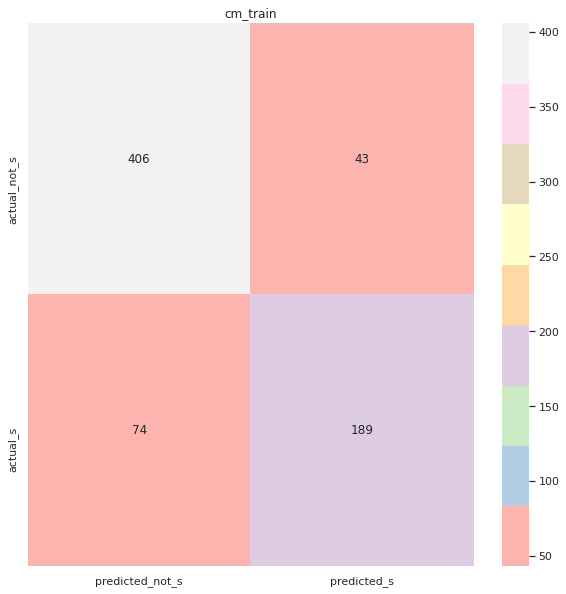

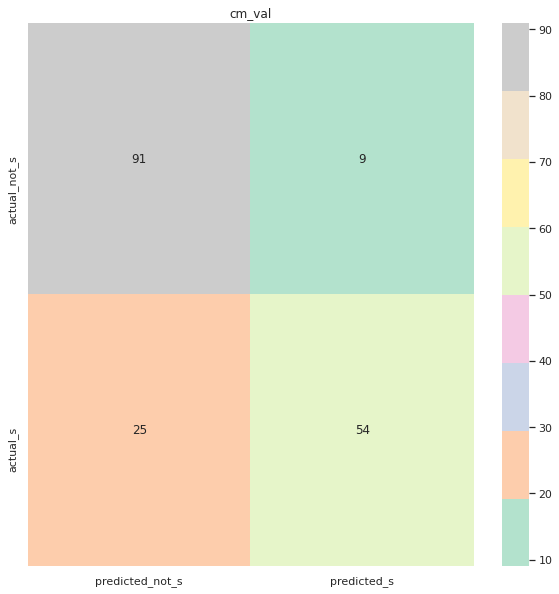

In [406]:
# lot confusion matrix of train and val as heatmaps in seaborn
cm_train_df = pd.DataFrame(cm_train, index=['actual_not_s', 'actual_s'], columns=['predicted_not_s', 'predicted_s'])
cm_val_df = pd.DataFrame(cm_val, index=['actual_not_s', 'actual_s'], columns=['predicted_not_s', 'predicted_s'])

sns.set(font_scale=1)
plt.figure(figsize = (10,10))
fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
fig.set_title("cm_train")
plt.show()
print()
plt.figure(figsize = (10,10))
fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
fig.set_title("cm_val")
plt.show()

In [407]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')

Train: precision 0.81, recall 0.72, specificity 0.90, fpr 0.10, accuracy 0.84
Val:   precision 0.86, recall 0.68, specificity 0.91, fpr 0.09, accuracy 0.81


# KNN model using grid search

In [408]:
# Select hyper-parameters to KNN model on full data
hyper_parameters = {'n_neighbors': list(range(1, 20)), 'weights': ('uniform', 'distance'),
                     'p':(1, 2)}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_encoded, t)
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

gs_neigh_model 0.8181846713953925
best params {'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}


#**Predictions**

In [409]:
from sklearn.neighbors import KNeighborsRegressor
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters).fit(X_encoded, t)
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

gs_neigh_model 0.34477203524735095
best params {'n_neighbors': 17}


In [410]:
gs_model.best_params_

{'alpha': 0.001,
 'eta0': 0.1,
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'penalty': 'l1'}

In [411]:
final_model = AdaBoostClassifier(**ada_gs.best_params_, random_state=1).fit(X_encoded, t)

In [412]:
print('train accuracy: ', final_model.score(X_encoded, t))
print('val accuracy: ', final_model.score(x_val, t_val))

train accuracy:  0.9102132435465768
val accuracy:  0.888268156424581


In [413]:
knn_model = KNeighborsClassifier(**gs_neigh_model.best_params_).fit(X_encoded, t)
print('train accuracy:', knn_model.score(X_encoded, t))
print('val accuracy:', knn_model.score(x_val, t_val))

train accuracy: 0.8249158249158249
val accuracy: 0.776536312849162


In [414]:
test_encode = pd.DataFrame(ct.fit_transform(test_df))

Prediction to adaboost

In [415]:
#y_pred = final_model.predict(test_encode).astype('int64')

Prediction to knn

In [416]:
y_pred = knn_model.predict(test_encode).astype('int64')

Prediction to AdaBoosting

In [418]:
y_pred = knn_model.predict(test_encode).astype('int64')

In [419]:
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": y_pred
})
    
submission.to_csv('knnSubmission.csv', index=False)


#Summary:
This work was really good for my knowlage , it was a great blend of the fifth,sixth,seventh class exercises .

It was nice to work without cleaning the data.

It was very suprising to see that the sumbition of the knn was greater than the adaboost , because of the score we achived on the train dataframe.
I am disaponting that i was not able to increase my best score , altough i manage to equal it.

After further reading on the internet I realized that there were specific women who did not survive the Titanic at the test set and apparently my model predicts they survived which explains the relatively high FN percentage in my final model. Country and I had more time to deal with it I would go back to the feature engineering phase again and try to create and play with the data more in depth

#Prefernces

Class notebooks  :fifth,sixth,seventh exercises .


#Submissions
Submisions list as the best score is on top

![picture](https://i.ibb.co/hXqZ7rQ/image.png)


##Table :

![picture](https://i.ibb.co/0nxyy2K/image.png)
